<a href="https://colab.research.google.com/github/NicKylis/letter_recognition/blob/christine/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print ("hello world!")

hello world!


In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [72]:
import tarfile
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# with tarfile.open(os.path.join(), "r:gz") as tar:
#     tar.extractall("res")

In [73]:
import struct
from array import array
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28, 1)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [74]:
training_images_filepath = '/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
training_labels_filepath = '/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'
test_images_filepath = '/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-images-idx3-ubyte/train-images-idx3-ubyte'
test_labels_filepath = '/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-labels-idx1-ubyte/train-labels-idx1-ubyte'

In [75]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [76]:
import random

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

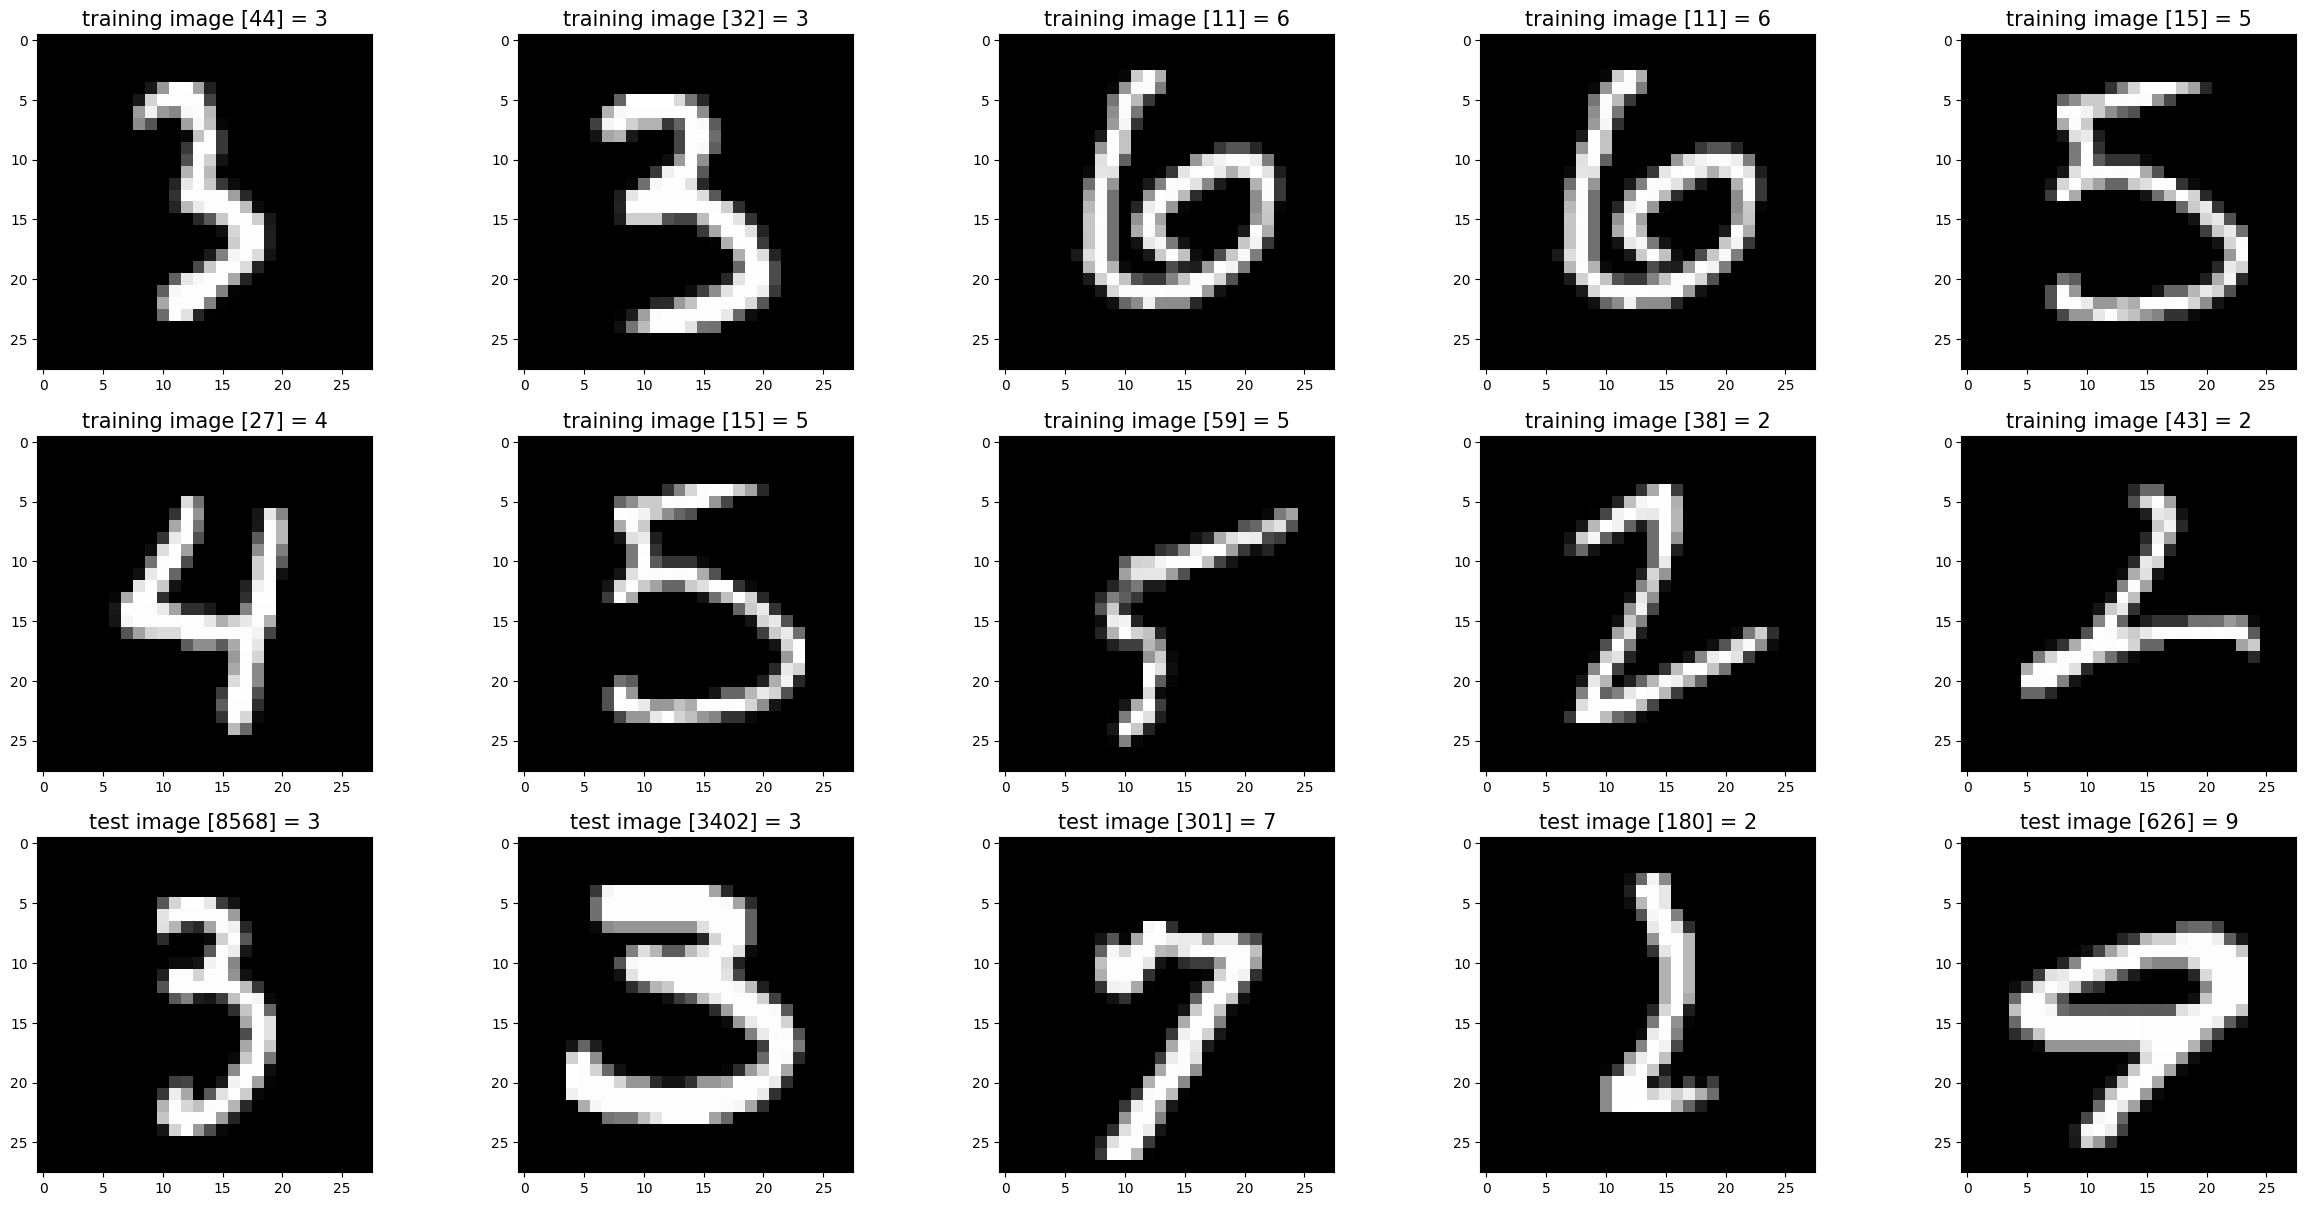

In [77]:
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

In [78]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 output neurons for digits 0-9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)  # For 10 classes (digits 0-9)
y_test = to_categorical(y_test, num_classes=10)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

train_gen =  ImageDataGenerator()
train_generator = train_gen.flow(x_train, y_train, batch_size=32)
test_gen =  ImageDataGenerator()
test_generator = test_gen.flow(x_test, y_test, batch_size=32)

In [80]:
callbacks = []

save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'custom_model_weights.keras', save_best_only=True, verbose=0)
callbacks.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True, verbose=0)
callbacks.append(early_stop_callback)

history = model.fit(x_train, y_train, epochs=50, batch_size=128, verbose = 1, callbacks=callbacks)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5949 - loss: 11.2248
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9448 - loss: 0.1831
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9762 - loss: 0.0719
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0572
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9939 - loss: 0.0228
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9978 - loss: 0.0105
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9995 - loss: 0.0048
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.0686e-04
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 7.6540e-04
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1

In [81]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9705 - loss: 0.1785
Test Accuracy: 0.9712


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


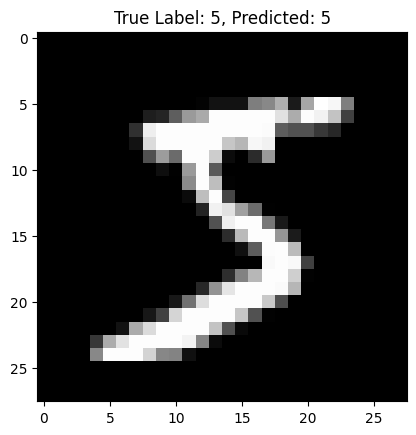

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


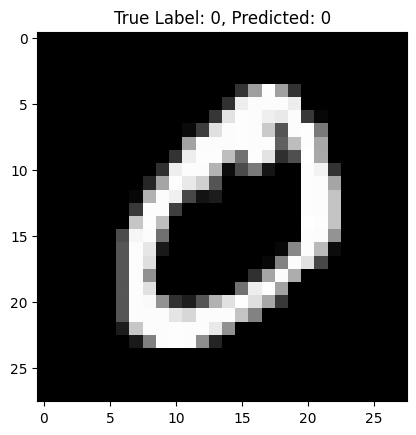

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


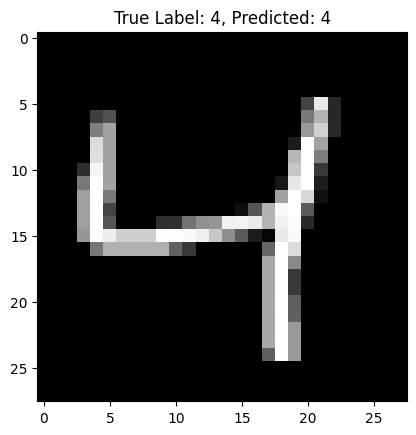

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


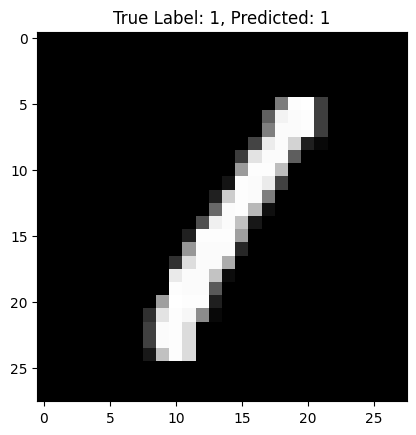

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


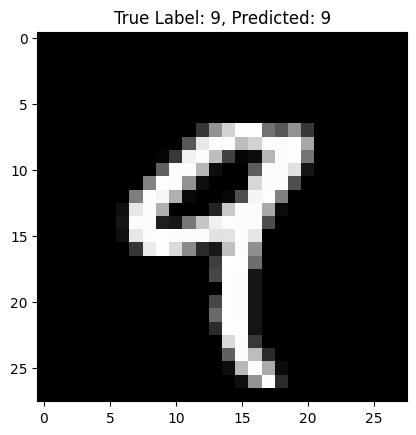

In [82]:
import matplotlib.pyplot as plt

# Plot the first 5 test images with predictions and true labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 and plot
    predicted_label = np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1)))
    plt.title(f"True Label: {np.argmax(y_test[i])}, Predicted: {predicted_label}")
    plt.show()

In [83]:
model.save("letter_recognition_model.keras")